### 경사하강법 구현

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 데이터
X = np.array([0.0, 1.0, 2.0])
y = np.array([3.0, 3.5, 5.5])

# 기울기와 절편값을 0으로 초기화
W = 0 
b = 0 

# 하이퍼파라미터
lrate = 0.01 
epochs = 1000

In [5]:
n = float(len(X))  # 데이터 개수 (실수형으로 저장)

3.0

In [6]:
for i in range(epochs):
    y_pred = W*X + b  # hypothesis
    
    # gradient
    dW = (2/n) * sum(X*(y_pred - y)) 
    db = (2/n) * sum(y_pred - y)
    
    # update
    W = W-lrate*dW 
    b = b-lrate*db

In [9]:
print(W, b)  # 최종 결과

y_pred = W*X + b
print(y_pred)

1.2532418085611319 2.745502230882486
[2.74550223 3.99874404 5.25198585]


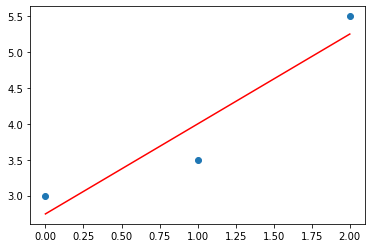

In [11]:
plt.scatter(X, y)
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')

### 선형회귀 실습1

In [12]:
from sklearn import linear_model

In [16]:

X = [[0], [1], [2]]  # 입력은 2차원으로
y = [3, 3.5, 5.5]

In [17]:
lr = linear_model.LinearRegression()  # 모델 생성
lr.fit(X,y)

LinearRegression()

In [19]:
print(lr.coef_)  # 기울기
print(lr.intercept_)  # 절편 

[1.25]
2.7500000000000004


In [20]:
lr.score(X,y)

0.8928571428571429

In [21]:
lr.predict([[5]])

array([9.])

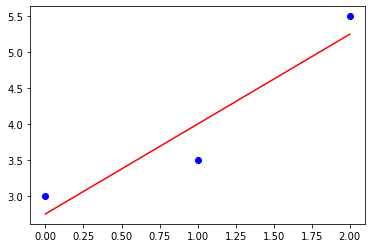

In [22]:
plt.scatter(X, y, color='b')
y_pred = lr.predict(X)

plt.plot(X, y_pred, color='red')
plt.show()

### 실습2
- 키와 몸무게

In [31]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

In [32]:
X = [[174], [152], [138], [128], [186]]
y = [71, 55, 46, 38, 88]

lr.fit(X, y)

LinearRegression()

In [33]:
lr.coef_ , lr.intercept_

(array([0.82021132]), -68.0248807089298)

In [34]:
lr.predict([[165]])

array([67.30998637])

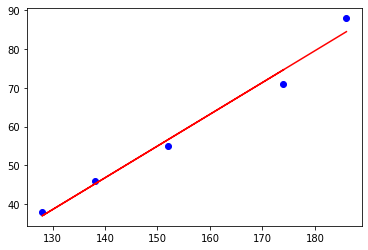

In [35]:
plt.scatter(X, y, color='b')
y_pred = lr.predict(X)

plt.plot(X, y_pred, color='red')
plt.show()

array([67.30998637])

### 실습3
- 당뇨병

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [40]:
X, y = datasets.load_diabetes(return_X_y=True)  # 특징, 정답데이터 한 번에 불러오기

In [51]:
# BMI 특징만 추려내서 2차원으로 만들기
X_new = X[:, 2].reshape(len(X[:,2]), -1)  # [X:, np.newaxis, 2]와 동일

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=0)

In [54]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

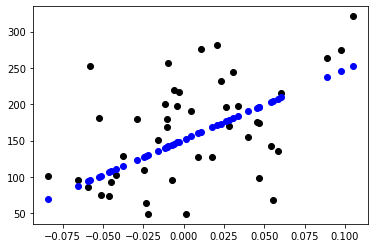

In [62]:
y_pred = lr.predict(X_test)

plt.scatter(X_test, y_test, color='black')  # 정답
plt.scatter(X_test, y_pred, color="blue")     # 예측값 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
X = np.array([0.0, 1.0, 2.0])
y = np.array([3.0, 3.5, 5.5])

W = 0
b = 0
lrate = 0.01
epochs = 1000
n = float(len(X))

In [26]:
for i in range(epochs):
    y_pred = W*X + b
    err = y_pred - y
    
    dW = (2/n)*np.sum(X*err)
    db = (2/n)*np.sum(err)
    
    W -= lrate*dW
    b -= lrate*db

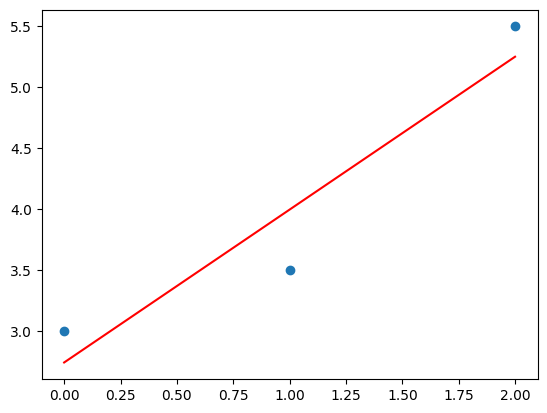

In [27]:
y_pred = W*X + b

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 사이킷런의 입력데이터는 2차원 배열
lr.fit(X.reshape(3,1), y)

LinearRegression()

In [34]:
lr.coef_, lr.intercept_

(array([1.25]), 2.7500000000000004)

In [37]:
lr.score(X.reshape(-1, 1), y)


0.8928571428571429

In [42]:
X.shape

(3,)

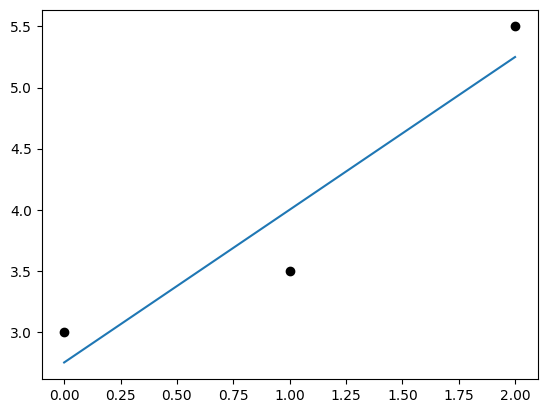

In [51]:
plt.scatter(X, y, color='black')
y_pred = lr.predict(X.reshape(-1, 1))
plt.plot(X, y_pred)

In [58]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[174], [153], [138], [128], [186]])
y = np.array([71, 55, 46, 38, 88])

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)


LinearRegression()

[67.14849624]


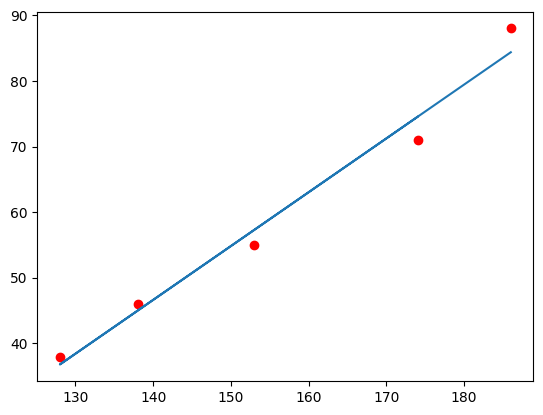

In [63]:
y_pred = lr.predict(X)

plt.scatter(X, y, color='red')
plt.plot(X, y_pred)
print(lr.predict([[165]]))

In [64]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [71]:
diabetes_X_new = diabetes_X[:, np.newaxis, 2]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_new, diabetes_y, test_size=0.1, random_state=42)

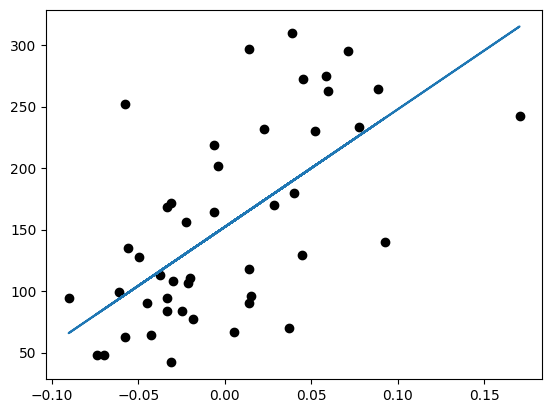

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred)

In [86]:
import numpy as np

def perceptron(x1, x2):
    X = np.array([x1, x2])
    W = np.array([1.0, 1.0])
    b = -1.5
    
    sum = np.dot(X, W) + b
    if sum > 0.00001:
        return 1
    else: 
        return 0
    
print(perceptron(1, 1))

1


In [87]:
from sklearn.linear_model import Perceptron

X = [[0,0], [0,1], [1,0], [1,1]]
y = [0,0,0,1]

clf = Perceptron(tol=1e-3, random_state=42)
clf.fit(X,y)
print(clf.predict(X))

[0 0 0 1]
